In [ ]:
# Spotify 2024 Analysis - Data Cleaning

In [ ]:
# 1. Import Libraries

In [1]:
# Libraries
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
from pathlib import Path
import chardet  # For automatic encoding detection
# Result
print("Libraries imported successfully")

# Set up visualization style
plt.style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10
# Result
print("Visualization style set")

# See all the columns and rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', '{:.2f}'.format)
# Result
print("Format Columns and Rows set")

Libraries imported successfully
Visualization style set
Format Columns and Rows set


In [ ]:
# 2. Load Data 

In [2]:
## 2.1 Define Utility Functions

# Find project root
def find_project_root(marker_file="Most Streamed Spotify Songs 2024.csv"):
    current_path = Path(os.getcwd())
    
    # Search upward through parent folders
    for parent in [current_path] + list(current_path.parents):
        
        # Check for Data folder with target file
        data_path = parent / "Data" / marker_file
        if data_path.exists():
            print(f"Found project root: {parent}")
            return parent
        
        # Alternative: check for file directly in parent
        if (parent / marker_file).exists():
            print(f"Found project root: {parent}")
            return parent
    
    # If not found
    print("Could not locate project root containing your data file")
    print(f"Searching for: {marker_file}")
    print(f"Search path: {current_path} -> {current_path.parents[-1]}")
    return None

# Automatic encoding detection
def detect_encoding(file_path):
    try:
        with open(file_path, 'rb') as file:
            raw_data = file.read(10000)  # First bytes for detection
            result = chardet.detect(raw_data)
            detected_encoding = result['encoding']
            confidence = result['confidence']
            print(f"Detected encoding: {detected_encoding} (confidence: {confidence:.2f})")
            return detected_encoding 
    except Exception as e:
        print(f"Encoding detection failed: {e}")
        return None

# Load data function
def load_data():
    data_path = Path("Data") / "Most Streamed Spotify Songs 2024.csv"

    if not data_path.exists():
        print(f"File not found: {data_path}")
        return None

    # Automatic detection
    detected_encoding = detect_encoding(data_path)
    encodings = [detected_encoding] if detected_encoding else []

    # Manual fallbacks
    encodings.extend(['utf-8', 'utf-8-sig', 'latin-1', 'iso-8859-1', 'cp1252'])
    encodings = list(dict.fromkeys(filter(None, encodings)))  # Remove None and duplicates

    for encoding in encodings:
        try:
            df = pd.read_csv(data_path, encoding=encoding)
            print(f"Succesfully loaded with {encoding} encoding")
            return df
        except Exception as e:
            print(f"Failed with {encoding}: {str(e)[:100]}...")

    print("\nTry these solutions:")
    print("1. Verify the file exists in the Data folder")
    print("2. Check for file corruption")
    print(f"3. Current directory: {Path.cwd()}")
    return None

In [3]:
## 2.2 Set Working Directory

# Set working directory to project root
project_root = find_project_root()
if project_root:
    os.chdir(project_root)
    print(f"Working directory set to: {project_root}")
else:
    print("Cannot proceed without project root")

Found project root: c:\ARCHIVOS\DOCUMENTS\Mary\Alvaro\Portfolio\Python\Project 1
Working directory set to: c:\ARCHIVOS\DOCUMENTS\Mary\Alvaro\Portfolio\Python\Project 1


In [4]:
## 2.3 Load and Preview the Data

# Load and preview data
print("=== Start Data Load ===")
df = load_data()

if df is not None:
    print("\n === Data Loaded Successfully ===")
    print(f"Shape: {df.shape}")
    print("\nFirst 5 rows:")
    display(df.head(5))
else:
    print("\nFailed to load DataFrame")

=== Start Data Load ===
Detected encoding: ISO-8859-1 (confidence: 0.73)
Succesfully loaded with ISO-8859-1 encoding

 === Data Loaded Successfully ===
Shape: (4600, 29)

First 5 rows:


,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,Spotify Popularity,YouTube Views,YouTube Likes,TikTok Posts,TikTok Likes,TikTok Views,YouTube Playlist Reach,Apple Music Playlist Count,AirPlay Spins,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,TIDAL Popularity,Explicit Track
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,4/26/2024,QM24S2402528,1,725.40,"390,470,936","30,716","196,631,588",92.00,"84,274,754","1,713,126","5,767,700","651,565,900","5,332,281,936","150,597,040",210.00,"40,975",684,62.00,"17,598,718",114.00,"18,004,655","22,931","4,818,457","2,669,262",NaN,0
1,Not Like Us,Not Like Us,Kendrick Lamar,5/4/2024,USUG12400910,2,545.90,"323,703,884","28,113","174,597,137",92.00,"116,347,040","3,486,739","674,700","35,223,547","208,339,025","156,380,351",188.00,"40,778",3,67.00,"10,422,430",111.00,"7,780,028","28,444","6,623,075","1,118,279",NaN,1
2,i like the way you kiss me,I like the way you kiss me,Artemas,3/19/2024,QZJ842400387,3,538.40,"601,309,283","54,331","211,607,669",92.00,"122,599,116","2,228,730","3,025,400","275,154,237","3,369,120,610","373,784,955",190.00,"74,333",536,136.00,"36,321,847",172.00,"5,022,621","5,639","7,208,651","5,285,340",NaN,0
3,Flowers,Flowers - Single,Miley Cyrus,1/12/2023,USSM12209777,4,444.90,"2,031,280,633","269,802","136,569,078",85.00,"1,096,100,899","10,629,796","7,189,811","1,078,757,968","14,603,725,994","3,351,188,582",394.00,"1,474,799","2,182",264.00,"24,684,248",210.00,"190,260,277","203,384",NaN,"11,822,942",NaN,0
4,Houdini,Houdini,Eminem,5/31/2024,USUG12403398,5,423.30,"107,034,922","7,223","151,469,874",88.00,"77,373,957","3,670,188","16,400",NaN,NaN,"112,763,851",182.00,"12,185",1,82.00,"17,660,624",105.00,"4,493,884","7,006","207,179","457,017",NaN,1


In [ ]:
# 3. Data Cleaning

In [5]:
# 3.1 Duplicate Values

# Visualize
if df is not None:
    # Check for exact duplicates (Before)
    initial_count = len(df)
    exact_duplicates = df.duplicated().sum()
    print(f"Initial rows: {initial_count:,}")
    print(f"\nDuplicate rows: {exact_duplicates}")

Initial rows: 4,600

Duplicate rows: 2


In [6]:
# How handle duplicate values?

# Situation: It could be that those 2 rows were duplicated by mistake
# Decision: Remove it, it does not give value to the data

# Sitation Before Handeling the Duplicate Values
before_state = {
    'total_rows': initial_count,
    'duplicate_rows': exact_duplicates,
    'sample_duplicates': df[df.duplicated(keep=False)]
                }
# Action: Remove Duplicates
df = df.drop_duplicates()
print("Removed duplicates")

# Sitation After Handeling the Duplicate Values
print("\n=== Before/After Comparison ===")
print(f"| {'Metric':<20} | {'Before':>10} | {'After':>10} |")
print(f"| {'-'*20} | {'-'*10} | {'-'*10} |")
print(f"| {'Total Rows':<20} | {before_state['total_rows']:>10,} | {len(df):>10,} |")
print(f"| {'Duplicate Rows':<20} | {before_state['duplicate_rows']:>10} | {df.duplicated().sum():>10} |")

# Sample duplicates that were removed
if before_state['duplicate_rows'] > 0:
    print("\n=== Sample Removed Duplicates ===")
    display(before_state['sample_duplicates'])

Removed duplicates

=== Before/After Comparison ===
| Metric               |     Before |      After |
| -------------------- | ---------- | ---------- |
| Total Rows           |      4,600 |      4,598 |
| Duplicate Rows       |          2 |          0 |

=== Sample Removed Duplicates ===


,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,Spotify Popularity,YouTube Views,YouTube Likes,TikTok Posts,TikTok Likes,TikTok Views,YouTube Playlist Reach,Apple Music Playlist Count,AirPlay Spins,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,TIDAL Popularity,Explicit Track
2449,Tennessee Orange,Tennessee Orange,Megan Moroney,9/2/2022,TCAGJ2289254,"2,424",28.90,"227,893,586","28,139","12,480,714",73.00,"30,913,276","159,791","77,661","13,324,305","117,505,652","238,206,228",33.00,"129,172",34,5.00,"1,370",49.00,"56,972,562","26,968","1,336,043","708,143",NaN,0
2450,Tennessee Orange,Tennessee Orange,Megan Moroney,9/2/2022,TCAGJ2289254,"2,424",28.90,"227,893,586","28,139","12,480,714",73.00,"30,913,276","159,791","77,661","13,324,305","117,505,652","238,206,228",33.00,"129,172",34,5.00,"1,370",49.00,"56,972,562","26,968","1,336,043","708,143",NaN,0
3447,Dembow,Dembow,Danny Ocean,12/8/2017,USWL11700269,"3,441",23.30,"579,189,526","60,397","11,805,084",65.00,"828,853,696","3,086,157","84,450","21,202,350","158,504,854","199,705,679",34.00,"5,406",9,20.00,"37,649",12.00,"6,723,858","7,832",NaN,"1,619,550",NaN,0
3450,Dembow,Dembow,Danny Ocean,12/8/2017,USWL11700269,"3,441",23.30,"579,189,526","60,397","11,805,084",65.00,"828,853,696","3,086,157","84,450","21,202,350","158,504,854","199,705,679",34.00,"5,406",9,20.00,"37,649",12.00,"6,723,858","7,832",NaN,"1,619,550",NaN,0


In [7]:
# 3.2 Standarization 
# Remove white spaces/aditional characters 
# Convert to the correct Data Types
# Correct format of Titles

# Visualize Data Types of all columns
print("\nData types:")
print(df.dtypes)
# Almost all the columns have a format of object, they were not well captured

# Create Lists

# True numeric columns 
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
# Text columns
text_cols = df.select_dtypes(include=['object', 'string']).columns.tolist()
# Protected text columns (never convert to numeric, otherwise becomes a null)
protected_text = ['Track', 'Artist', 'Album Name','Release Date']
# Special case: Columns requiring exact case (ISRC-Code with all capital letters)
case_sensitive_cols = ['ISRC']

# Detect numeric-as-text columns (Excluding protected text & case sensitive)
def is_mostly_numeric(s):
    # Removes commas/spaces first, checks for any numeric values
    return (
        s.astype(str)
        .str.replace(',', '')
        .str.replace(' ', '')
        .str.match(r'^-?\d*\.?\d+$')
        .any()  
    )

numeric_as_text = [
    col for col in text_cols 
    if col not in protected_text 
    and col not in case_sensitive_cols  
    and is_mostly_numeric(df[col])
]

print("Text columns:", text_cols)
print("Numeric-as-text to convert:", numeric_as_text)

# Start Cleaning (Remove White Spaces & Correct format of Titles)

print("\n=== Text Cleaning ===")

for col in text_cols:
    if col not in numeric_as_text:  # Skip columns marked for numeric conversion
        if col in case_sensitive_cols:
            # Special handling for ISRC: Only strip whitespace, preserve case
            df[col] = df[col].str.strip()
            print(f"Cleaned {col} (case-sensitive, whitespace only)")
        else:
            # Standard text cleaning for others (White Spaces & Same letter format)
            df[col] = df[col].str.strip().str.title()
            print(f"Cleaned {col} (standardized text)")

# Convert protected text columns to optimal types
df['Track'] = df['Track'].astype('string')
df['Artist'] = df['Artist'].astype('string')
df['Album Name'] = df['Album Name'].astype('string')
df['Release Date'] = pd.to_datetime(df['Release Date'], errors='coerce')  
print("Converted text columns to optimized types (string/datetime)")

# Numeric Conversion

print("\n=== Numeric Conversion ===")

for col in numeric_as_text:
    # Remove commas (thousand separators), keep decimals
    df[col] = (
        df[col].astype(str)
        .str.replace(',', '', regex=False)  # Remove commas
        .str.replace(' ', '', regex=False)  # Remove Spaces
        .pipe(pd.to_numeric, errors='coerce')  # Convert to float
    )
    null_count = df[col].isnull().sum()
    print(f"Converted {col} to float | New nulls: {null_count}")  

# Convert from Float to Int the respective columns

print("\n=== Integer Conversion ===")

int_cols = [
    'All Time Rank', 'Spotify Streams',
    'Spotify Playlist Count', 'Spotify Playlist Reach', 'YouTube Views', 
    'YouTube Likes', 'TikTok Posts', 'TikTok Likes', 
    'TikTok Views', 'YouTube Playlist Reach', 'Apple Music Playlist Count',
    'AirPlay Spins', 'SiriusXM Spins', 'Deezer Playlist Count', 
    'Deezer Playlist Reach', 'Amazon Playlist Count', 'Pandora Streams', 
    'Pandora Track Stations', 'Soundcloud Streams', 'Shazam Counts', 
    'Explicit Track'
]  

for col in int_cols:
    if col in df.columns:
        df[col] = df[col].astype('Int64')  # Capital "I" for nullable integer
        print(f"Converted {col} to Int64")  

# Validation 

print("\n=== Final Data Types ===")
print(df.dtypes)

print("\n=== Null Count ===")
print(df.isnull().sum()[df.isnull().sum() > 0])

print("\n=== Sample Values ===")
display(df.head(5))



Data types:
Track                          object
Album Name                     object
Artist                         object
Release Date                   object
ISRC                           object
All Time Rank                  object
Track Score                   float64
Spotify Streams                object
Spotify Playlist Count         object
Spotify Playlist Reach         object
Spotify Popularity            float64
YouTube Views                  object
YouTube Likes                  object
TikTok Posts                   object
TikTok Likes                   object
TikTok Views                   object
YouTube Playlist Reach         object
Apple Music Playlist Count    float64
AirPlay Spins                  object
SiriusXM Spins                 object
Deezer Playlist Count         float64
Deezer Playlist Reach          object
Amazon Playlist Count         float64
Pandora Streams                object
Pandora Track Stations         object
Soundcloud Streams             object

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,Spotify Popularity,YouTube Views,YouTube Likes,TikTok Posts,TikTok Likes,TikTok Views,YouTube Playlist Reach,Apple Music Playlist Count,AirPlay Spins,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,TIDAL Popularity,Explicit Track
0,Million Dollar Baby,Million Dollar Baby - Single,Tommy Richman,2024-04-26,QM24S2402528,1,725.40,390470936,30716,196631588,92.00,84274754,1713126,5767700,651565900,5332281936,150597040,210,40975,684,62,17598718,114,18004655,22931,4818457,2669262,NaN,0
1,Not Like Us,Not Like Us,Kendrick Lamar,2024-05-04,USUG12400910,2,545.90,323703884,28113,174597137,92.00,116347040,3486739,674700,35223547,208339025,156380351,188,40778,3,67,10422430,111,7780028,28444,6623075,1118279,NaN,1
2,I Like The Way You Kiss Me,I Like The Way You Kiss Me,Artemas,2024-03-19,QZJ842400387,3,538.40,601309283,54331,211607669,92.00,122599116,2228730,3025400,275154237,3369120610,373784955,190,74333,536,136,36321847,172,5022621,5639,7208651,5285340,NaN,0
3,Flowers,Flowers - Single,Miley Cyrus,2023-01-12,USSM12209777,4,444.90,2031280633,269802,136569078,85.00,1096100899,10629796,7189811,1078757968,14603725994,3351188582,394,1474799,2182,264,24684248,210,190260277,203384,<NA>,11822942,NaN,0
4,Houdini,Houdini,Eminem,2024-05-31,USUG12403398,5,423.30,107034922,7223,151469874,88.00,77373957,3670188,16400,<NA>,<NA>,112763851,182,12185,1,82,17660624,105,4493884,7006,207179,457017,NaN,1



=== Missing Value Analysis (Before) ===
Total rows: 4598
Columns with nulls: 22/29
Columns without nulls: 7/29

Missing value report:


,Null Count,% Missing
TIDAL Popularity,4598,100.00
Soundcloud Streams,3332,72.47
SiriusXM Spins,2123,46.17
Pandora Track Stations,1268,27.58
TikTok Posts,1173,25.51
Pandora Streams,1106,24.05
Amazon Playlist Count,1055,22.94
YouTube Playlist Reach,1009,21.94
TikTok Views,981,21.34
TikTok Likes,980,21.31


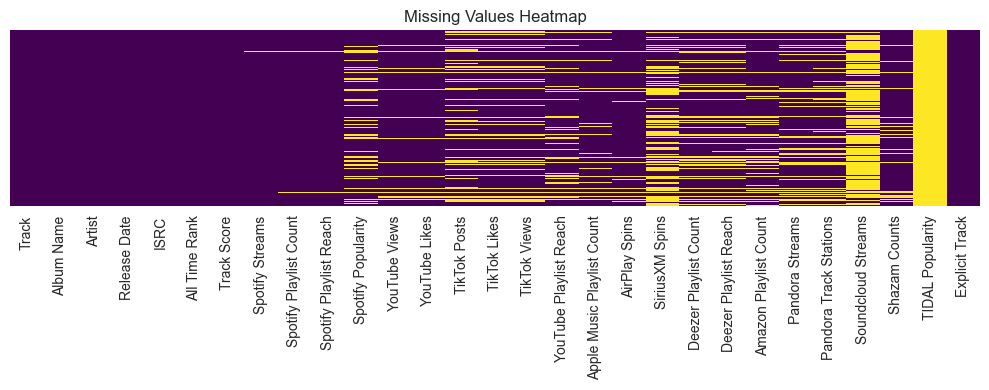

In [8]:
# 3.3 Missing Values

# Visualize
if df is not None:
    # Calculate absolute null counts before percentages
    null_counts = df.isnull().sum()
    missing_stats = (null_counts / len(df)) * 100
    
    print("\n=== Missing Value Analysis (Before) ===")
    print(f"Total rows: {len(df)}")
    print(f"Columns with nulls: {len(null_counts[null_counts > 0])}/{len(df.columns)}")
    print(f"Columns without nulls: {len(null_counts[null_counts == 0])}/{len(df.columns)}")
    
    if missing_stats.sum() == 0:
        print("No missing values found")
    else:
        # Show absolute counts alongside percentages
        missing_report = pd.DataFrame({
            'Null Count': null_counts[missing_stats > 0],
            '% Missing': missing_stats[missing_stats > 0]
        }).sort_values('% Missing', ascending=False)
        print("\nMissing value report:")
        display(missing_report)
        
        # Visual representation
        plt.figure(figsize=(10,4))
        sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap='viridis')
        plt.title("Missing Values Heatmap")
        plt.tight_layout()
        plt.show()

In [9]:
# How handle missing values?

# Situation Before Handling Missing Values
print("\n=== Missing Value Analysis (Before) ===")
before_null_counts = df.isnull().sum()
before_missing_stats = (before_null_counts / len(df)) * 100
print(f"Total rows: {len(df)}")
print(f"Columns with nulls: {len(before_null_counts[before_null_counts > 0])}/{len(df.columns)}")
print(f"Total null values: {before_null_counts.sum()}")

# Create a threshold 
missing_thresholds = {
    'DROP_COL': 70,    # Columns with >70% missing
    'IMPUTE': 20,      # Columns with 20-70% missing
    'KEEP': 20         # Columns with <20% missing
}


# Only process columns that actually have missing values
columns_to_process = before_missing_stats[before_missing_stats > 0]

# Create a loop to have a decission depending on the % Missing in the calculation of  missing_stats for all columns 
print("\nChanges Applied")
for col, percent in missing_stats.items():
    if percent >= missing_thresholds['DROP_COL']:
        df.drop(col, axis=1, inplace=True)
        print(f"Dropped {col} ({percent:.1f}% missing)")
    
    elif percent >= missing_thresholds['IMPUTE']:
        if pd.api.types.is_numeric_dtype(df[col]):
            median_val = int(round(df[col].median())) 
            df[col] = df[col].fillna(median_val)
            print(f"Filled {col} with integer median: {median_val}")
        else:
            df[col] = df[col].fillna("Unknown")
            print(f"Filled {col} (categorical) with 'Unknown'")
    
    elif percent > 0:
        if pd.api.types.is_numeric_dtype(df[col]):
            median_val = int(round(df[col].median()))
            df[col] = df[col].fillna(median_val)
            print(f"Filled {col} (<20% nulls) with integer median: {median_val}")
        else:
            df[col] = df[col].fillna("Unknown")
            print(f"Filled {col} (<20% nulls) with 'Unknown")


# Case where there are no missing values
if len(columns_to_process) == 0:
    print("No missing values found, no changes needed")

# Situation After Handling Missing Values
print("\n=== Missing Value Analysis (After) ===")
after_null_counts = df.isnull().sum()
after_missing_stats = (after_null_counts / len(df)) * 100
print(f"Total rows: {len(df)}")
print(f"Columns remaining: {len(df.columns)}")
print(f"Columns with nulls: {len(after_null_counts[after_null_counts > 0])}/{len(df.columns)}")
print(f"Total null values: {after_null_counts.sum()}")

# Detailed comparison
comparison = pd.DataFrame({
    'Before_Null_Count': before_null_counts[before_null_counts.index.isin(df.columns)],
    'Before_%_Missing': before_missing_stats[before_missing_stats.index.isin(df.columns)],
    'After_Null_Count': after_null_counts,
    'After_%_Missing': after_missing_stats
}).sort_values('Before_%_Missing', ascending=False)

print("\n=== Detailed Comparison ===")
if len(comparison[comparison['Before_Null_Count'] > 0]) > 0:
    display(comparison[comparison['Before_Null_Count'] > 0])
else: 
    print("No columns has missing values to process")

if after_null_counts.sum() > 0:
    print("\nColumns with remaining nulls:")
    display(after_null_counts[after_null_counts > 0])
else:
    print("\nAll null values have been handled")


=== Missing Value Analysis (Before) ===
Total rows: 4598
Columns with nulls: 22/29
Total null values: 22797

Changes Applied
Filled Artist (<20% nulls) with 'Unknown
Filled Spotify Streams (<20% nulls) with integer median: 239850720
Filled Spotify Playlist Count (<20% nulls) with integer median: 32312
Filled Spotify Playlist Reach (<20% nulls) with integer median: 13264112
Filled Spotify Popularity (<20% nulls) with integer median: 67
Filled YouTube Views (<20% nulls) with integer median: 148269610
Filled YouTube Likes (<20% nulls) with integer median: 1257935
Filled TikTok Posts with integer median: 182529
Filled TikTok Likes with integer median: 26576922
Filled TikTok Views with integer median: 266064027
Filled YouTube Playlist Reach with integer median: 97746040
Filled Apple Music Playlist Count (<20% nulls) with integer median: 28
Filled AirPlay Spins (<20% nulls) with integer median: 5954
Filled SiriusXM Spins with integer median: 86
Filled Deezer Playlist Count with integer medi

,Before_Null_Count,Before_%_Missing,After_Null_Count,After_%_Missing
SiriusXM Spins,2123,46.17,0,0.00
Pandora Track Stations,1268,27.58,0,0.00
TikTok Posts,1173,25.51,0,0.00
Pandora Streams,1106,24.05,0,0.00
Amazon Playlist Count,1055,22.94,0,0.00
YouTube Playlist Reach,1009,21.94,0,0.00
TikTok Views,981,21.34,0,0.00
TikTok Likes,980,21.31,0,0.00
Deezer Playlist Reach,928,20.18,0,0.00
Deezer Playlist Count,921,20.03,0,0.00



All null values have been handled


In [10]:
# 4. Final Validations

# Ensures data meets quality standards before EDA:
# 1. No nulls/duplicates
# 2. No invalid negative values
# 3. Spotify business rules enforced
# 4. Reasonable date ranges

print("\n" + "="*50)
print("Final Data Validation Checks".center(50))
print("="*50)
remaining_nulls = df.isnull().sum().sum()
remaining_duplicates = df.duplicated().sum()
print(f"Remaining nulls: {remaining_nulls}")
print(f"Duplicate rows: {remaining_duplicates}")

validation_status = {
    'nulls_clean': remaining_nulls == 0,
    'duplicates_clean': remaining_duplicates == 0,
    'spotify_streams_valid': True,
    'date_range_valid': True
}

# Check for negative values in all numeric metrics
numeric_cols = df.select_dtypes(include=['int64', 'float64','Int64']).columns
for col in numeric_cols:
    if col in df.columns and len(df[col].dropna()) > 0: #Check column exists and has data
        if (df[col] < 0).any(): #Only check if column can have negatives
            neg_count = (df[col] < 0).sum()
            print(f"! {col}: {neg_count} negative values(review)")

# Spotify-specific sanity checks
print("\nSpotify-specific checks:")
if 'Spotify Streams' in df.columns: 
    invalid_streams = (df['Spotify Streams'] <= 0).sum()
    print(f"- Streams: {invalid_streams} rows with <= 0 streams")
    validation_status['spotify_streams_valid'] = invalid_streams == 0

if 'Spotify Playlist Count' in df.columns: 
    invalid_playlist = (df['Spotify Playlist Count'] < 0).sum()
    print(f"- Playlists: {invalid_playlist} rows with invalid playlist counts")

# Date validation (if Release Date was parsed)
if 'Release Date' in df.columns and df['Release Date'].notna().any():
    min_date = df['Release Date'].min()
    max_date = df['Release Date'].max()
    print(f"\nDate range: {min_date} to {max_date}")
    # Check for date range
    if min_date.year < 1900 or max_date.year > 2025:
        print("Date range may be incorrect (review)")
        validation_status['date_range_valid'] = False

# Validation Summary 
print("\n" + "="*50)
print("Cleaning Validation Summary ".center(50))
print("="*50)
print("All nulls removed" if validation_status['nulls_clean'] else "x Nulls remain")
print("No duplicates" if validation_status['duplicates_clean'] else "x Duplicates found")
print("Spotify metrics valid" if validation_status['spotify_streams_valid'] else "x Invalid streams")
print("Date range plausible" if validation_status['date_range_valid'] else "x Date range issues")

# Overall validation status
all_valid = all(validation_status.values())
print(f"\n{'Data Ready for EDA' if all_valid else 'Review Data Before EDA'}")


           Final Data Validation Checks           
Remaining nulls: 0
Duplicate rows: 0

Spotify-specific checks:
- Streams: 0 rows with <= 0 streams
- Playlists: 0 rows with invalid playlist counts

Date range: 1987-07-21 00:00:00 to 2024-06-14 00:00:00

           Cleaning Validation Summary            
All nulls removed
No duplicates
Spotify metrics valid
Date range plausible

Data Ready for EDA


In [11]:
# 5. Save changes 

def save_clean_data(df, filename="spotify_cleaned.csv"):
    
    clean_path = Path("Data") / filename
    clean_path.parent.mkdir(exist_ok=True)
    
    assert not df.empty, "Cannot save empty DataFrame"
    assert isinstance(df, pd.DataFrame), "Input must be a DataFrame"
    assert df.isnull().sum().sum() == 0, "DataFrame contains null values - cleaning incomplete"
    
    try:
        df.to_csv(clean_path, index=False, encoding = 'utf-8') # Force to utf-8
        if clean_path.exists():
            file_size = clean_path.stat().st_size
            print(f"Successfully saved ({len(df):,} rows, {len(df.columns)}  columns)")
            print(f"File size: {file_size / 1024:.1f} KB")
            return clean_path
        raise RuntimeError("File not created")
    except Exception as e:
        print(f"Primary save failed: {str(e)}")
        # Fallback save in current directory
        fallback_path = Path(filename)
        df.to_csv(fallback_path, index=False, encoding = 'utf-8')
        print(f"Saved fallback copy to: {fallback_path.absolute()}")
        return fallback_path

# Execute and report
print("\n" + "="*40)
print("Saving cleaned dataset...")
final_path = save_clean_data(df)
print(f"Final data location: {final_path.absolute()}")
print("="*40 + "\n")


Saving cleaned dataset...
Successfully saved (4,598 rows, 27  columns)
File size: 950.6 KB
Final data location: c:\ARCHIVOS\DOCUMENTS\Mary\Alvaro\Portfolio\Python\Project 1\Data\spotify_cleaned.csv

